In [1]:
!dir

 Volume in drive C is OS
 Volume Serial Number is ECFF-C11A

 Directory of C:\Github\Linear-Equation-Solver

08-07-2019  00:19    <DIR>          .
08-07-2019  00:19    <DIR>          ..
07-07-2019  20:20    <DIR>          .ipynb_checkpoints
07-07-2019  22:52    <DIR>          dataset
08-07-2019  00:19            75,005 Dataset creation.ipynb
07-07-2019  20:20           199,556 division and equals merging.ipynb
07-07-2019  20:20            13,910 division_testing.jpg
07-07-2019  20:20           209,151 Final extracting individual symbols.ipynb
07-07-2019  20:20            25,167 hard_test.jpg
07-07-2019  20:20            36,177 random_tests.jpg
07-07-2019  20:20                29 README.md
07-07-2019  20:20            20,800 simple_equation.jpg
07-07-2019  20:20           259,741 testing letter detection.ipynb
               9 File(s)        839,536 bytes
               4 Dir(s)  285,617,356,800 bytes free


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import os
import cv2 as cv
import pandas as pd
from sklearn.model_selection import  train_test_split
from keras import models
from keras import layers
from keras.utils import to_categorical
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16821634738591400681
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3078304563
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17825391308199705286
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [200]:
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 4} ) 
sess = tf.Session(config=config)
keras.backend.set_session(sess)

In [5]:
def disp_img(img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()

In [6]:
mpl.rcParams['figure.dpi']= 180

In [7]:
data_dir = './dataset'
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', 'x', 'div', '=', '(', ')']

In [8]:
num_classes = len(labels)
print(f'Number of classes = {num_classes}')

Number of classes = 17


In [9]:
dataset = []

In [10]:
for label in labels:
    count = 0
    path = os.path.join(data_dir, label)
    label_val = labels.index(label)
    for img in os.listdir(path):
        count+=1
        if count > 6000:
            break
        pad = 1
        gray = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
        blurred = cv.GaussianBlur(gray, (3, 3), 5)
        thresh = cv.adaptiveThreshold(blurred, 255, 0, 1, 115, 1)
        padded = cv.copyMakeBorder(thresh, top=pad, bottom=pad, left=pad, right=pad, borderType= cv.BORDER_CONSTANT, value=[0,0,0] )
        dataset.append([padded, label_val])

In [11]:
len(dataset)

80420

In [12]:
df = pd.DataFrame(dataset, columns=list('Xy'))
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80420 entries, 0 to 80419
Data columns (total 2 columns):
X    80420 non-null object
y    80420 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [14]:
df.head(100)

,X,y
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",6
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",10
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",10
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",16


In [156]:
X = df.X
y = df.y

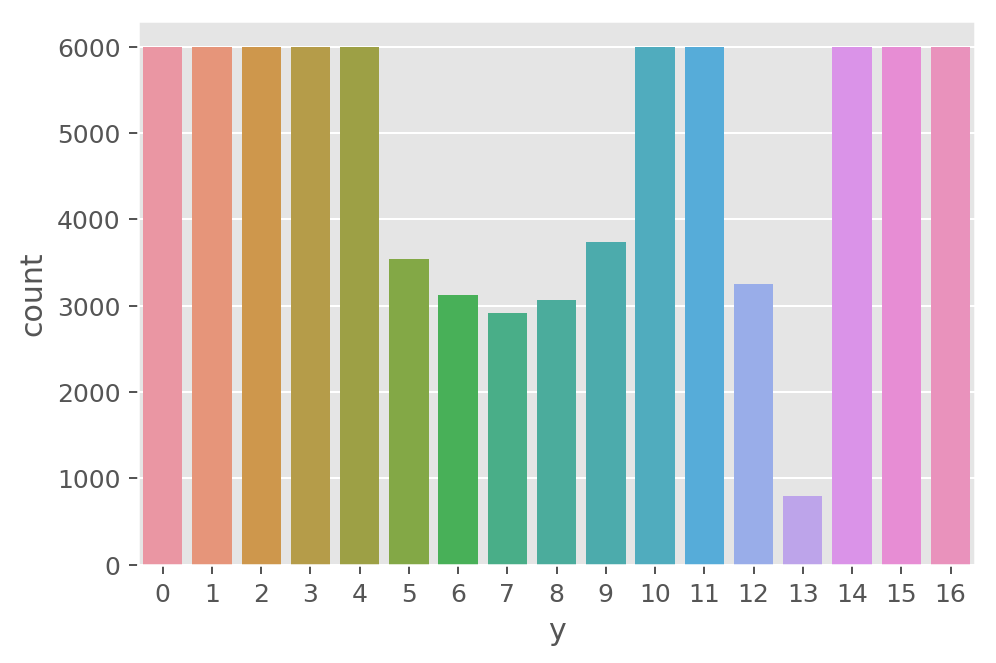

In [157]:
g = sns.countplot(y)

In [158]:
X.shape

(80420,)

In [159]:
X = np.stack(X)

In [160]:
X = X/255.0

In [161]:
X = X.reshape(80420, 47, 47, 1)

In [162]:
y = to_categorical(y, num_classes = num_classes)

In [172]:
X.shape, y.shape

((80420, 47, 47, 1), (80420, 17))

In [192]:
type(X)

numpy.ndarray

In [164]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [201]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (47, 47, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation = 'softmax'))

In [202]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 45, 45, 32)        320       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 8, 8, 64)          36928     
__________

In [203]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [204]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_data = (X_val, y_val), verbose=1)

Train on 72378 samples, validate on 8042 samples
Epoch 1/20
72378/72378 [==============================] - 238s 3ms/step - loss: 0.3963 - acc: 0.8866 - val_loss: 0.1169 - val_acc: 0.9669
Epoch 2/20
72378/72378 [==============================] - 226s 3ms/step - loss: 0.1507 - acc: 0.9579 - val_loss: 0.0682 - val_acc: 0.9811
Epoch 3/20
72378/72378 [==============================] - 213s 3ms/step - loss: 0.1161 - acc: 0.9687 - val_loss: 0.0606 - val_acc: 0.9822
Epoch 4/20
72378/72378 [==============================] - 205s 3ms/step - loss: 0.1018 - acc: 0.9724 - val_loss: 0.0528 - val_acc: 0.9868
Epoch 5/20
72378/72378 [==============================] - 212s 3ms/step - loss: 0.0951 - acc: 0.9743 - val_loss: 0.0554 - val_acc: 0.9852
Epoch 6/20
72378/72378 [==============================] - 204s 3ms/step - loss: 0.0939 - acc: 0.9750 - val_loss: 0.0537 - val_acc: 0.9871
Epoch 7/20
72378/72378 [==============================] - 202s 3ms/step - loss: 0.0929 - acc: 0.9757 - val_loss: 0.0499 - v

In [205]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

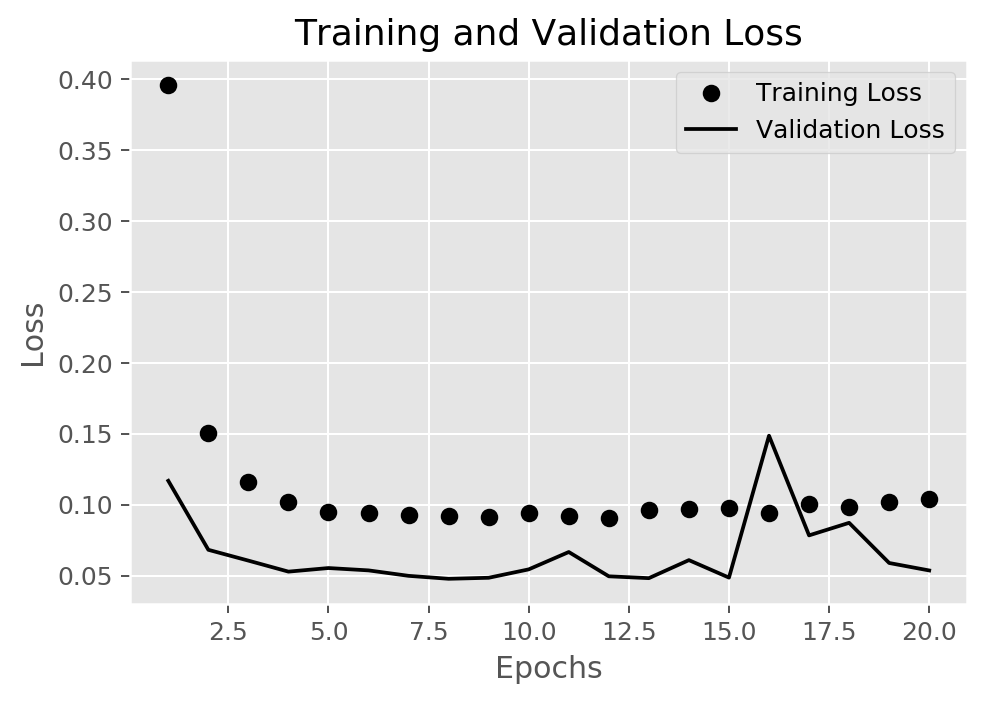

In [206]:
epochs = range(1, 21)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

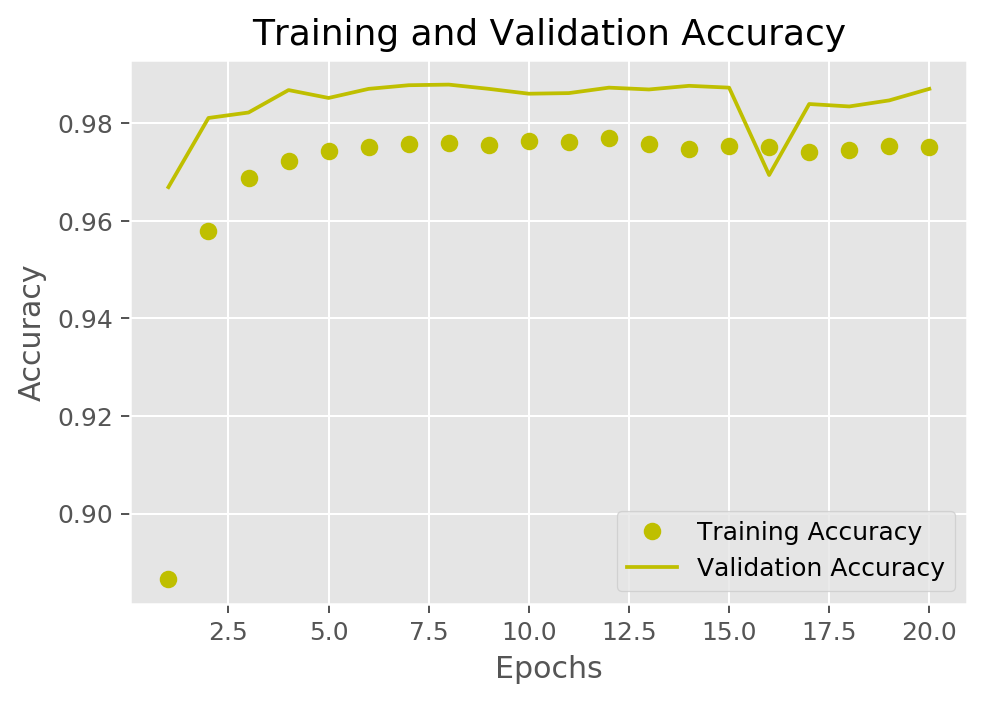

In [207]:
plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [ ]:
results = model.predict(X_test)

In [ ]:
results = np.argmax(results, axis = 1)
results = pd.Series(results, name = 'Label')

In [ ]:
results

In [208]:
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")